In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Read the data

In [4]:
df_netflix_short_titles = pd.read_csv("../data/netflix_genres_main.csv", low_memory=False)
viewingActivityDataFrame = pd.read_csv("../data/netflix_genres.csv", low_memory=False)
# viewingActivityDataFrame as df_netflix_genres

In [5]:
viewingActivityDataFrame['title'] = viewingActivityDataFrame['short_title']
viewingActivityDataFrame = viewingActivityDataFrame.drop(['Title', 'short_title'], axis=1)

In [6]:
viewingActivityDataFrame

,Start Time,Duration,title
0,12/31/16 0:30,0:01:19,7:19
1,3/5/18 4:35,0:05:18,300
2,4/7/19 5:29,0:18:56,706
3,4/6/19 5:20,1:31:56,706
4,4/6/19 3:07,1:06:03,706
...,...,...,...
1048570,NaN,NaN,#VALUE!
1048571,NaN,NaN,#VALUE!
1048572,NaN,NaN,#VALUE!
1048573,NaN,NaN,#VALUE!


# Prepare the Data

In [9]:
df_netflix_activity=pd.merge(viewingActivityDataFrame, df_netflix_short_titles, on='title', how='inner')
df_netflix_activity

,Start Time,Duration,title,type,listed_in
0,12/31/16 0:30,0:01:19,7:19,Movie,"Dramas, International Movies"
1,4/7/19 5:29,0:18:56,706,Movie,"Horror Movies, International Movies"
2,4/6/19 5:20,1:31:56,706,Movie,"Horror Movies, International Movies"
3,4/6/19 3:07,1:06:03,706,Movie,"Horror Movies, International Movies"
4,4/5/19 5:52,0:25:32,706,Movie,"Horror Movies, International Movies"
...,...,...,...,...,...
13932,5/10/20 2:14,0:18:10,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"
13933,5/10/20 1:54,0:18:42,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"
13934,5/10/20 1:39,0:13:41,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"
13935,5/6/20 3:11,0:00:58,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV"


In [10]:
# Convert Start time to Pacific Time Zone
df_netflix_activity['Start Time'] = pd.to_datetime(df_netflix_activity['Start Time'], utc = True)
df_netflix_activity = df_netflix_activity.set_index('Start Time')
df_netflix_activity.index = df_netflix_activity.index.tz_convert('US/Pacific')
df_netflix_activity = df_netflix_activity.reset_index()

# Extract weekday and hour from Start Time 
df_netflix_activity['weekday'] = df_netflix_activity['Start Time'].dt.weekday
df_netflix_activity['hour'] = df_netflix_activity['Start Time'].dt.hour
df_netflix_activity.head(10)

,Start Time,Duration,title,type,listed_in,weekday,hour
0,2016-12-30 16:30:00-08:00,0:01:19,7:19,Movie,"Dramas, International Movies",4,16
1,2019-04-06 22:29:00-07:00,0:18:56,706,Movie,"Horror Movies, International Movies",5,22
2,2019-04-05 22:20:00-07:00,1:31:56,706,Movie,"Horror Movies, International Movies",4,22
3,2019-04-05 20:07:00-07:00,1:06:03,706,Movie,"Horror Movies, International Movies",4,20
4,2019-04-04 22:52:00-07:00,0:25:32,706,Movie,"Horror Movies, International Movies",3,22
5,2019-04-04 21:52:00-07:00,0:00:19,706,Movie,"Horror Movies, International Movies",3,21
6,2020-11-03 20:23:00-08:00,0:01:47,1922,Movie,"Dramas, Thrillers",1,20
7,2020-03-21 13:58:00-07:00,0:06:19,3022,Movie,"Independent Movies, Sci-Fi & Fantasy, Thrillers",5,13
8,2020-03-20 22:03:00-07:00,0:00:39,3022,Movie,"Independent Movies, Sci-Fi & Fantasy, Thrillers",4,22
9,2020-08-29 22:23:00-07:00,0:35:10,22-Jul,Movie,"Dramas, Thrillers",5,22


In [11]:
df_netflix_activity['Duration']= pd.to_timedelta(df_netflix_activity['Duration'])
genres_split_df=df_netflix_activity["listed_in"].str.split(",", n = 5, expand = True)
df_netflix_activity['genre1'] = genres_split_df[0]
df_netflix_activity['genre2'] = genres_split_df[1]
df_netflix_activity['genre3'] = genres_split_df[2]

df_netflix_activity

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3
0,2016-12-30 16:30:00-08:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,16,Dramas,International Movies,None
1,2019-04-06 22:29:00-07:00,00:18:56,706,Movie,"Horror Movies, International Movies",5,22,Horror Movies,International Movies,None
2,2019-04-05 22:20:00-07:00,01:31:56,706,Movie,"Horror Movies, International Movies",4,22,Horror Movies,International Movies,None
3,2019-04-05 20:07:00-07:00,01:06:03,706,Movie,"Horror Movies, International Movies",4,20,Horror Movies,International Movies,None
4,2019-04-04 22:52:00-07:00,00:25:32,706,Movie,"Horror Movies, International Movies",3,22,Horror Movies,International Movies,None
...,...,...,...,...,...,...,...,...,...,...
13932,2020-05-09 19:14:00-07:00,00:18:10,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,19,International TV Shows,Reality TV,None
13933,2020-05-09 18:54:00-07:00,00:18:42,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None
13934,2020-05-09 18:39:00-07:00,00:13:41,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None
13935,2020-05-05 20:11:00-07:00,00:00:58,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",1,20,International TV Shows,Reality TV,None


### Get the hour and weekday and split the genres. Assume that Genre1 defines the movie more than Genre2. So if Title A is Drama and Thriller, it is more of a Drama than Thriller.

In [12]:
df_netflix_activity['Duration_Hours'] = df_netflix_activity['Duration'] / np.timedelta64(1, 'h')
df_netflix_activity

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3,Duration_Hours
0,2016-12-30 16:30:00-08:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,16,Dramas,International Movies,None,0.021944
1,2019-04-06 22:29:00-07:00,00:18:56,706,Movie,"Horror Movies, International Movies",5,22,Horror Movies,International Movies,None,0.315556
2,2019-04-05 22:20:00-07:00,01:31:56,706,Movie,"Horror Movies, International Movies",4,22,Horror Movies,International Movies,None,1.532222
3,2019-04-05 20:07:00-07:00,01:06:03,706,Movie,"Horror Movies, International Movies",4,20,Horror Movies,International Movies,None,1.100833
4,2019-04-04 22:52:00-07:00,00:25:32,706,Movie,"Horror Movies, International Movies",3,22,Horror Movies,International Movies,None,0.425556
...,...,...,...,...,...,...,...,...,...,...,...
13932,2020-05-09 19:14:00-07:00,00:18:10,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,19,International TV Shows,Reality TV,None,0.302778
13933,2020-05-09 18:54:00-07:00,00:18:42,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None,0.311667
13934,2020-05-09 18:39:00-07:00,00:13:41,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",5,18,International TV Shows,Reality TV,None,0.228056
13935,2020-05-05 20:11:00-07:00,00:00:58,Zumbo's Just Desserts,TV Show,"International TV Shows, Reality TV",1,20,International TV Shows,Reality TV,None,0.016111


# Analysis By Day

Text(0, 0.5, 'Number of Titles')

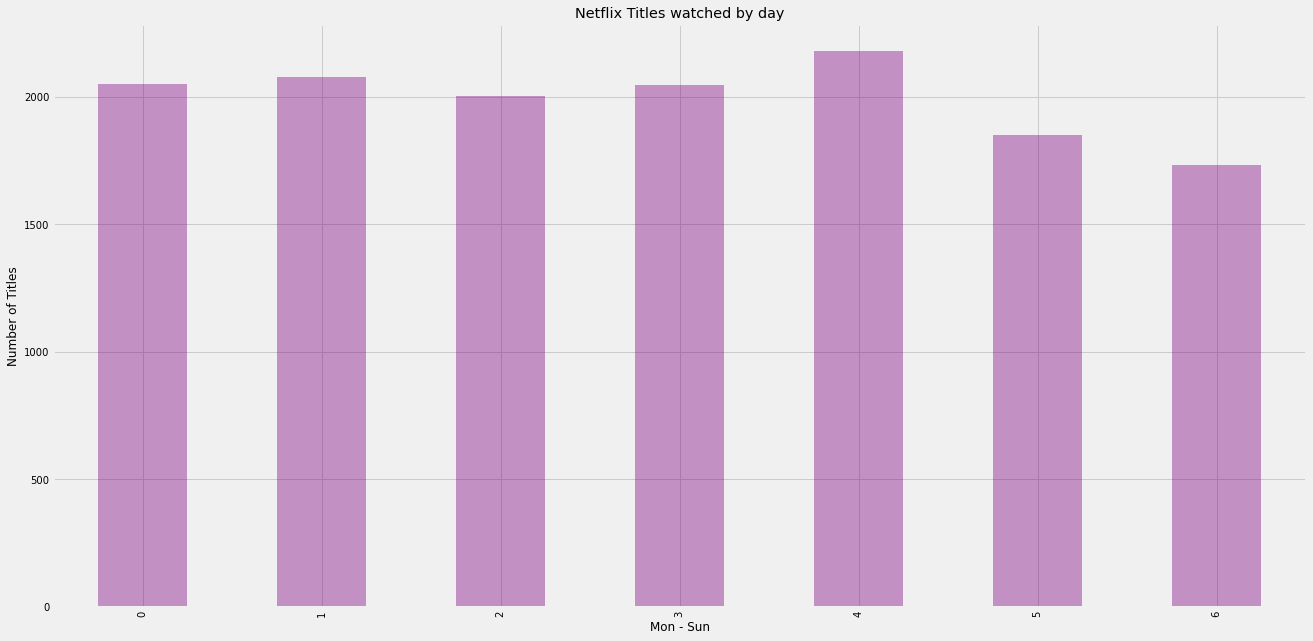

In [13]:
# convert weekday to Categorical data type
df_netflix_activity['weekday']=pd.Categorical(df_netflix_activity['weekday'],categories=[0,1,2,3,4,5,6],ordered=True)
netflix_by_day = df_netflix_activity['weekday'].value_counts().sort_index()
matplotlib.rcParams.update({'font.size':10})
g= netflix_by_day.plot(alpha=0.4, kind='bar', figsize=(20,10), color = 'purple', title = 'Netflix Titles watched by day');
g.set_xlabel('Mon - Sun');
g.set_ylabel('Number of Titles')

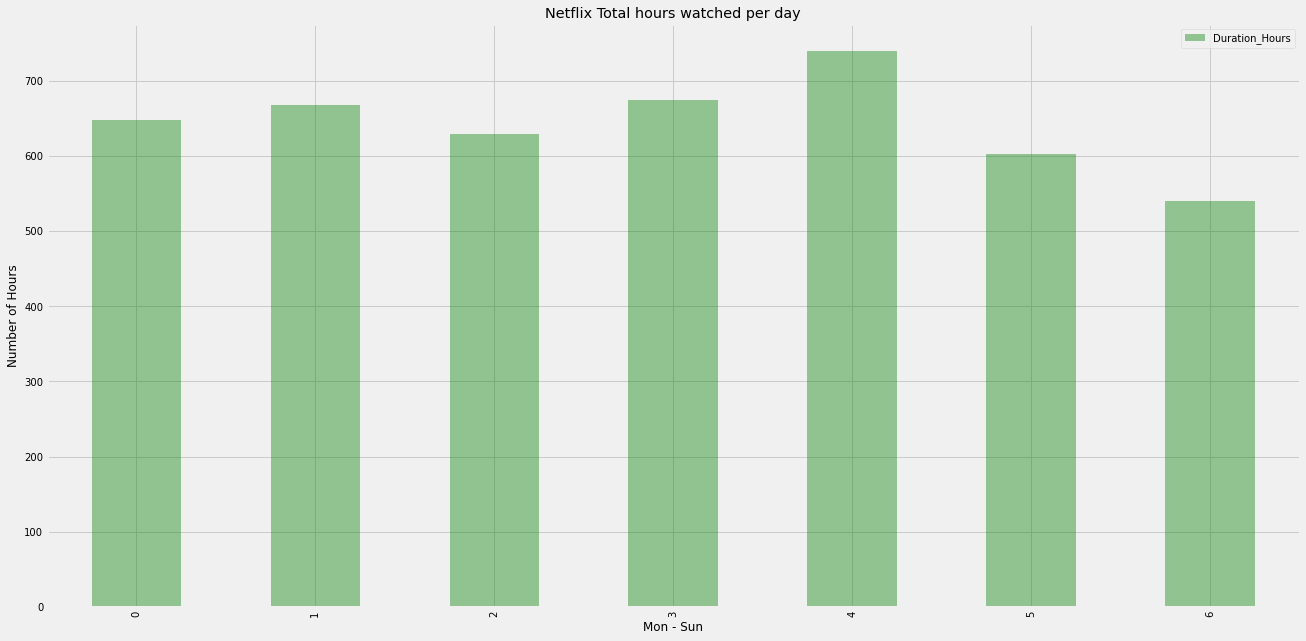

In [14]:
hours_spent_on_netflix_by_day = df_netflix_activity.groupby('weekday')['Duration_Hours'].sum().reset_index()
h= hours_spent_on_netflix_by_day.plot(alpha=0.4, kind='bar', figsize=(20,10), color='green' ,title = 'Netflix Total hours watched per day');
h.set_xlabel('Mon - Sun');
h.set_ylabel('Number of Hours');

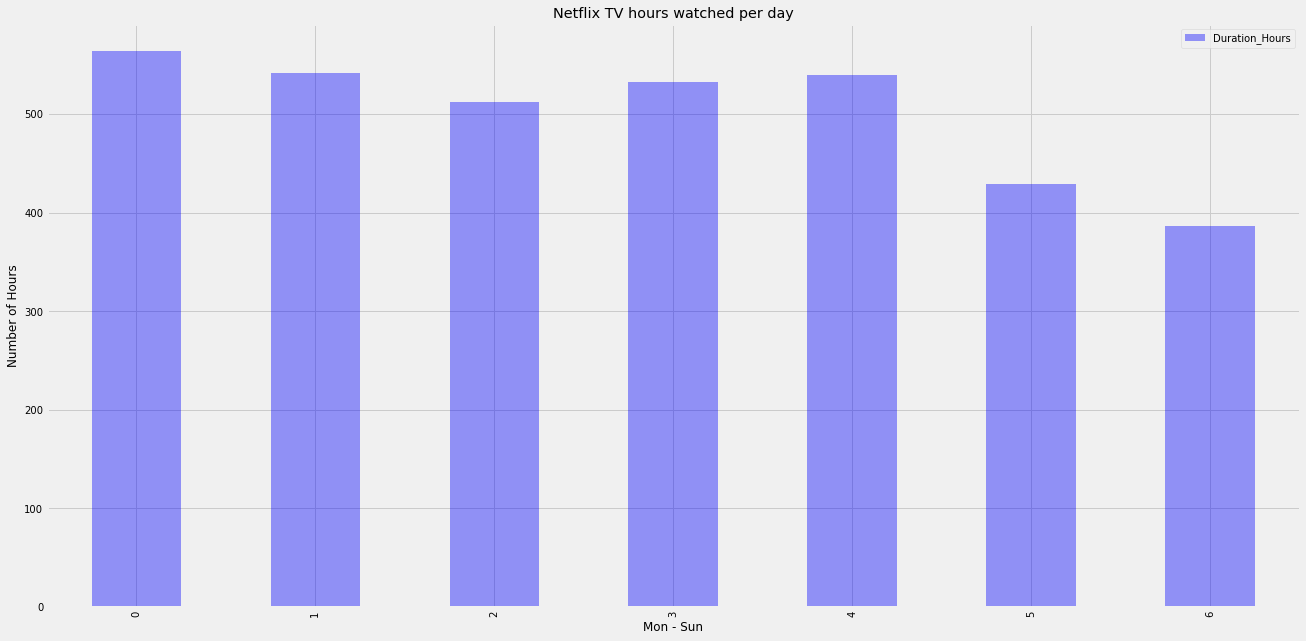

In [16]:
tv_shows = df_netflix_activity[df_netflix_activity['type'].str.contains('^TV',regex=True)]
tv_hours_spent_on_netflix_by_day = tv_shows.groupby('weekday')['Duration_Hours'].sum().reset_index()
tv_h= tv_hours_spent_on_netflix_by_day.plot(alpha=0.4, kind='bar', figsize=(20,10), color='blue' ,title = 'Netflix TV hours watched per day');
tv_h.set_xlabel('Mon - Sun');
tv_h.set_ylabel('Number of Hours');

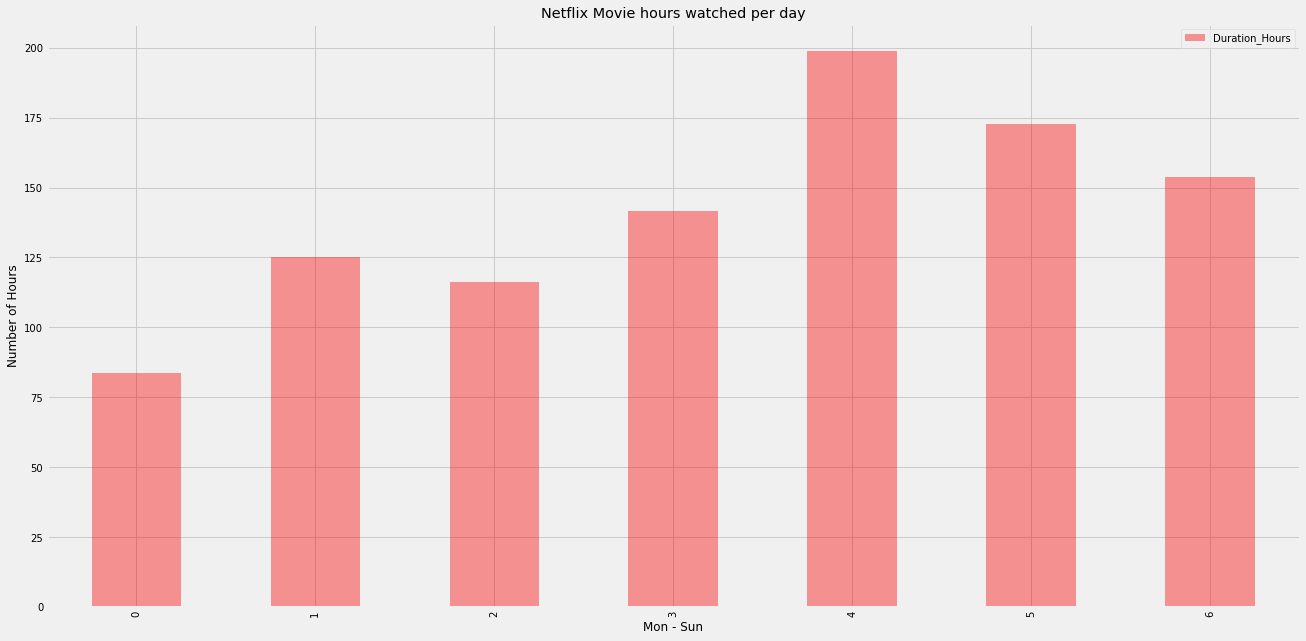

In [17]:
movies = df_netflix_activity[df_netflix_activity['type'].str.contains('^Movie',regex=True)]
movie_hours_spent_on_netflix_by_day = movies.groupby('weekday')['Duration_Hours'].sum().reset_index()
movie_h= movie_hours_spent_on_netflix_by_day.plot(alpha=0.4, kind='bar', figsize=(20,10), color='red' ,title = 'Netflix Movie hours watched per day');
movie_h.set_xlabel('Mon - Sun');
movie_h.set_ylabel('Number of Hours');

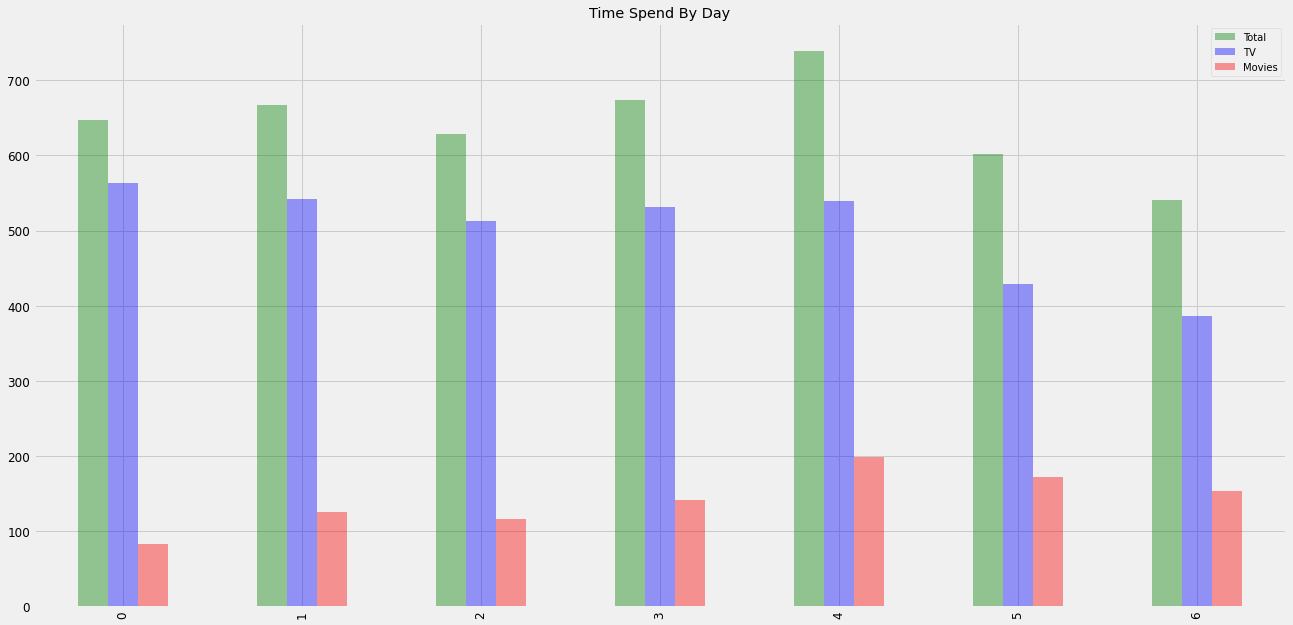

In [18]:
d=pd.DataFrame({'Total': hours_spent_on_netflix_by_day['Duration_Hours'],'TV':tv_hours_spent_on_netflix_by_day['Duration_Hours'], 'Movies':movie_hours_spent_on_netflix_by_day['Duration_Hours']})
d.plot.bar(alpha=0.4, color=['green','blue', 'red'],figsize=(20, 10), title='Time Spend By Day', fontsize=12);

# Hourly Analysis

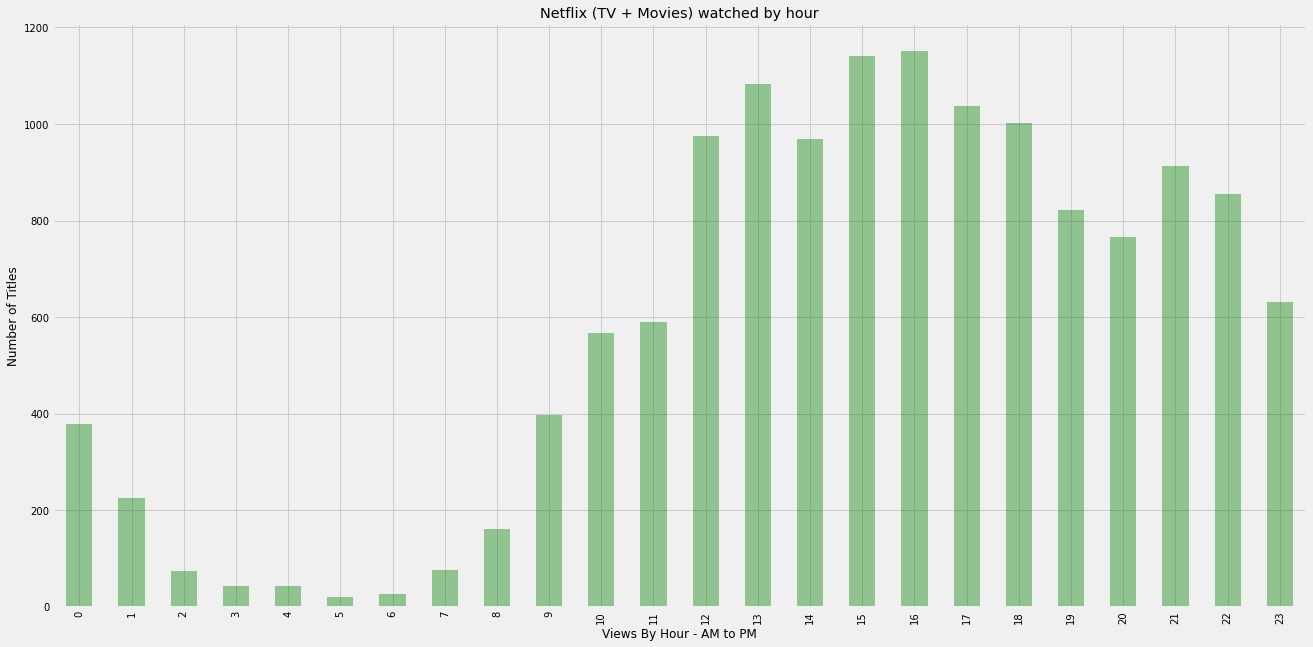

In [20]:
df_netflix_activity['hour'] = pd.Categorical(df_netflix_activity['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
netflix_by_hour = df_netflix_activity['hour'].value_counts()
netflix_by_hour = netflix_by_hour.sort_index()
h=netflix_by_hour.plot(alpha=0.4, color='green',kind='bar', figsize=(20,10), title = 'Netflix (TV + Movies) watched by hour');
h.set_xlabel('Views By Hour - AM to PM');
h.set_ylabel('Number of Titles');

<ipython-input-21-263ffca5a9a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['hour'] = pd.Categorical(tv_shows['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)


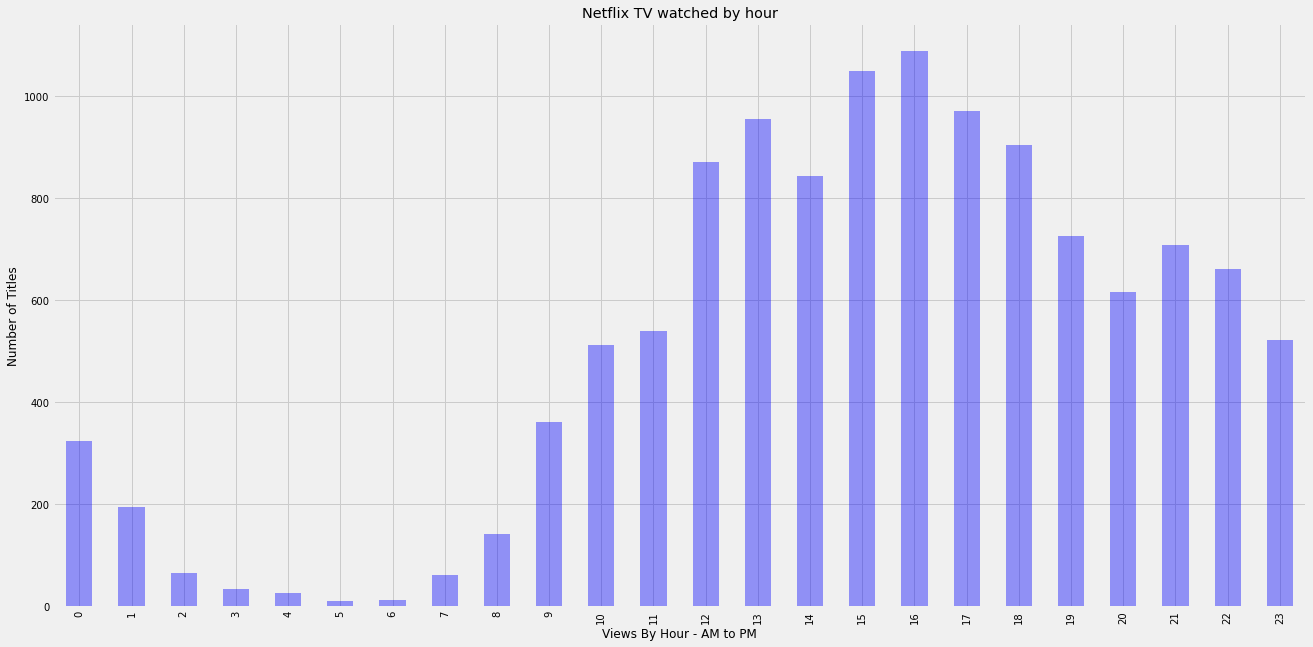

In [21]:
# set our categorical and define the order so the hours are plotted 0-23
tv_shows['hour'] = pd.Categorical(tv_shows['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
# create tv_shows_by_hour and count the rows for each hour, assigning the result to that variable
tv_shows_by_hour = tv_shows['hour'].value_counts()
# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
tv_shows_by_hour = tv_shows_by_hour.sort_index()
# plot tv_shows_by_hour as a bar chart with the listed size,title and label
h=tv_shows_by_hour.plot(alpha=0.4, color='blue', kind='bar', figsize=(20,10), title = 'Netflix TV watched by hour');
h.set_xlabel('Views By Hour - AM to PM');
h.set_ylabel('Number of Titles');

<ipython-input-22-0f180b2b6af9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['hour'] = pd.Categorical(movies['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)


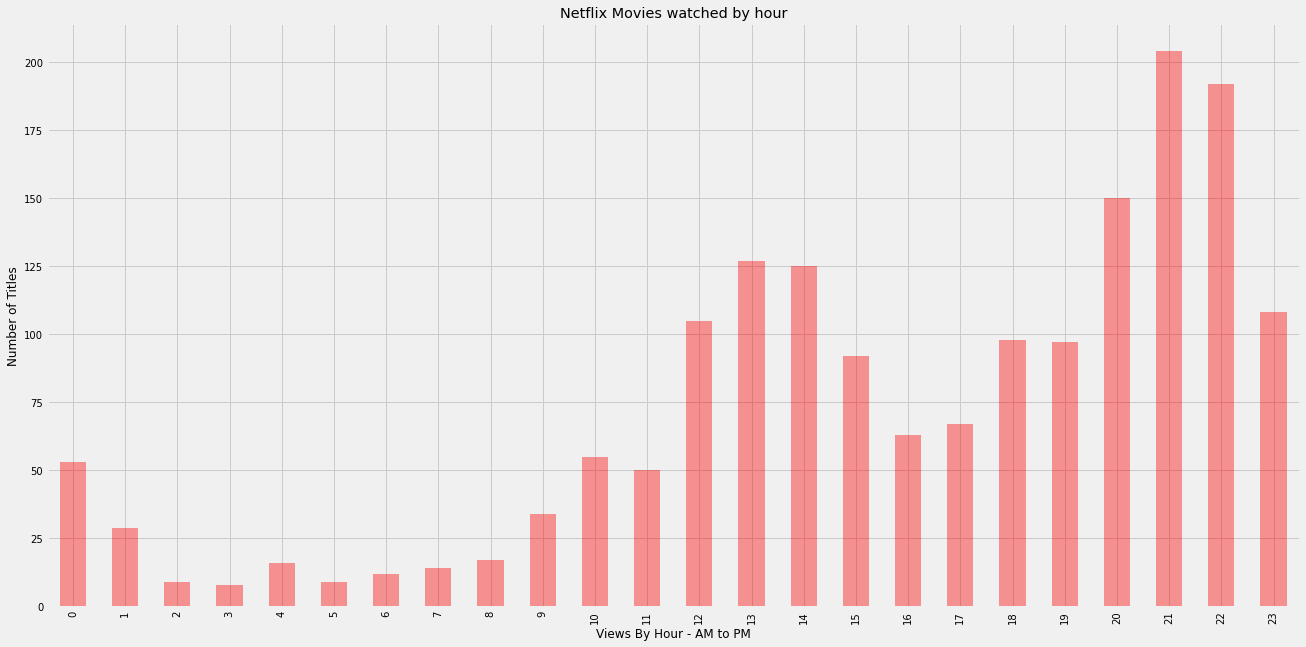

In [22]:
# set our categorical and define the order so the hours are plotted 0-23
movies['hour'] = pd.Categorical(movies['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
# create movies_by_hour and count the rows for each hour, assigning the result to that variable
movies_by_hour = movies['hour'].value_counts()
# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
movies_by_hour = movies_by_hour.sort_index()
# plot movies_by_hour as a bar chart with the listed size,title and label
h=movies_by_hour.plot(alpha=0.4, color='red', kind='bar', figsize=(20,10), title = 'Netflix Movies watched by hour');
h.set_xlabel('Views By Hour - AM to PM');
h.set_ylabel('Number of Titles');

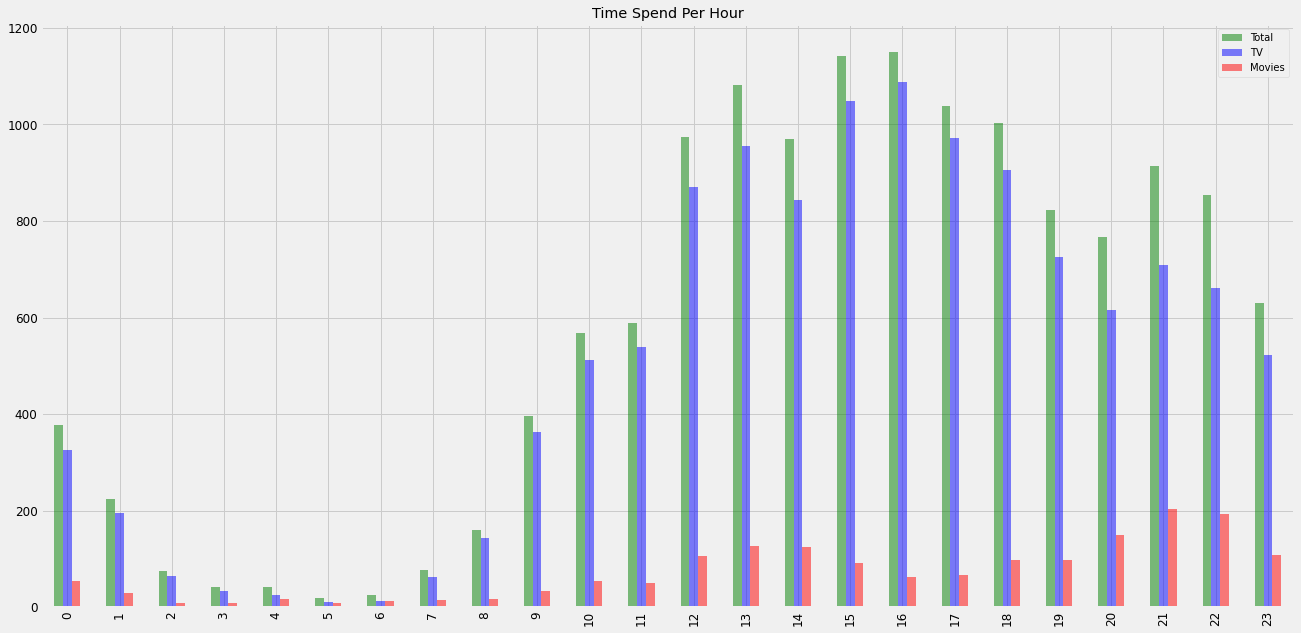

In [23]:
d=pd.DataFrame({'Total':netflix_by_hour,'TV':tv_shows_by_hour, 'Movies':movies_by_hour})
d.plot.bar(alpha=0.5, color=['green','blue','red' ],figsize=(20, 10), title='Time Spend Per Hour', fontsize=12);

# Genre Analysis

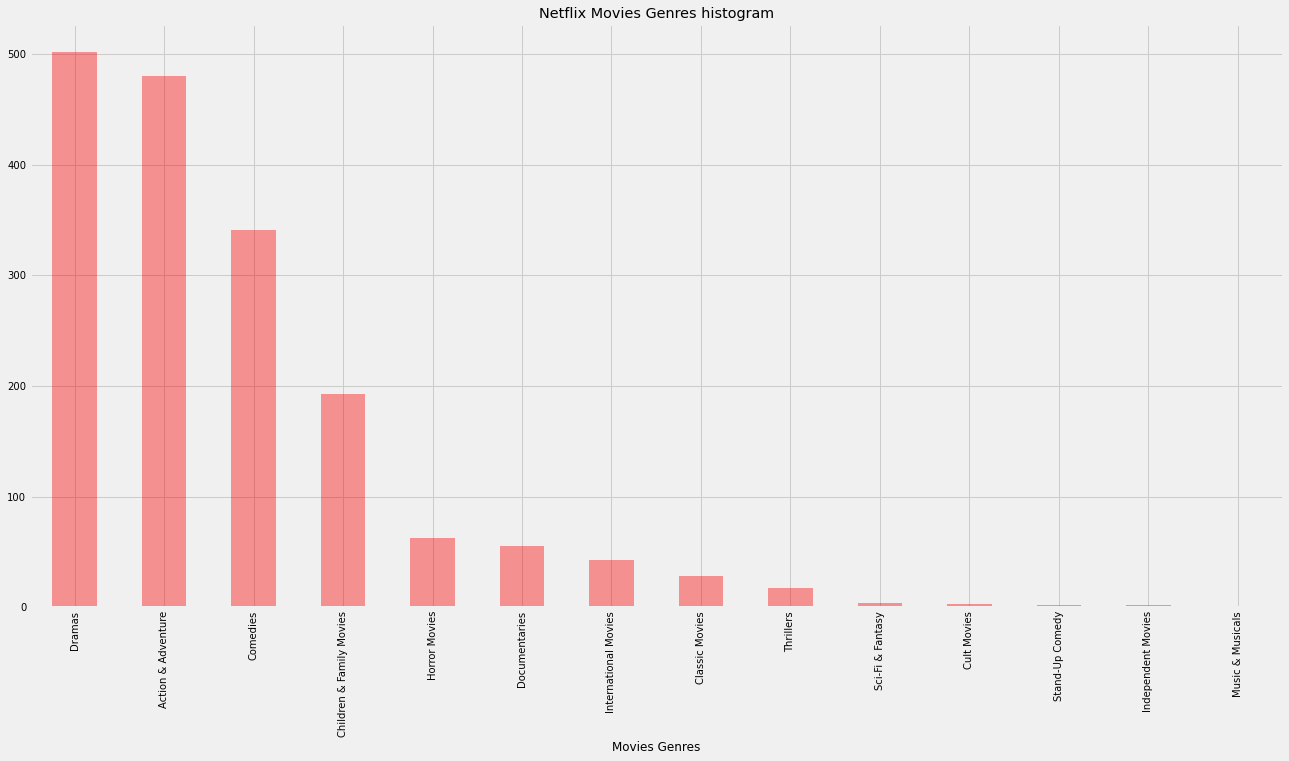

In [24]:
movies_by_genres = movies['genre1'].value_counts()
h=movies_by_genres.plot(alpha=0.4, color='red', kind='bar', figsize=(20,10), title = 'Netflix Movies Genres histogram');
h.set_xlabel('Movies Genres');

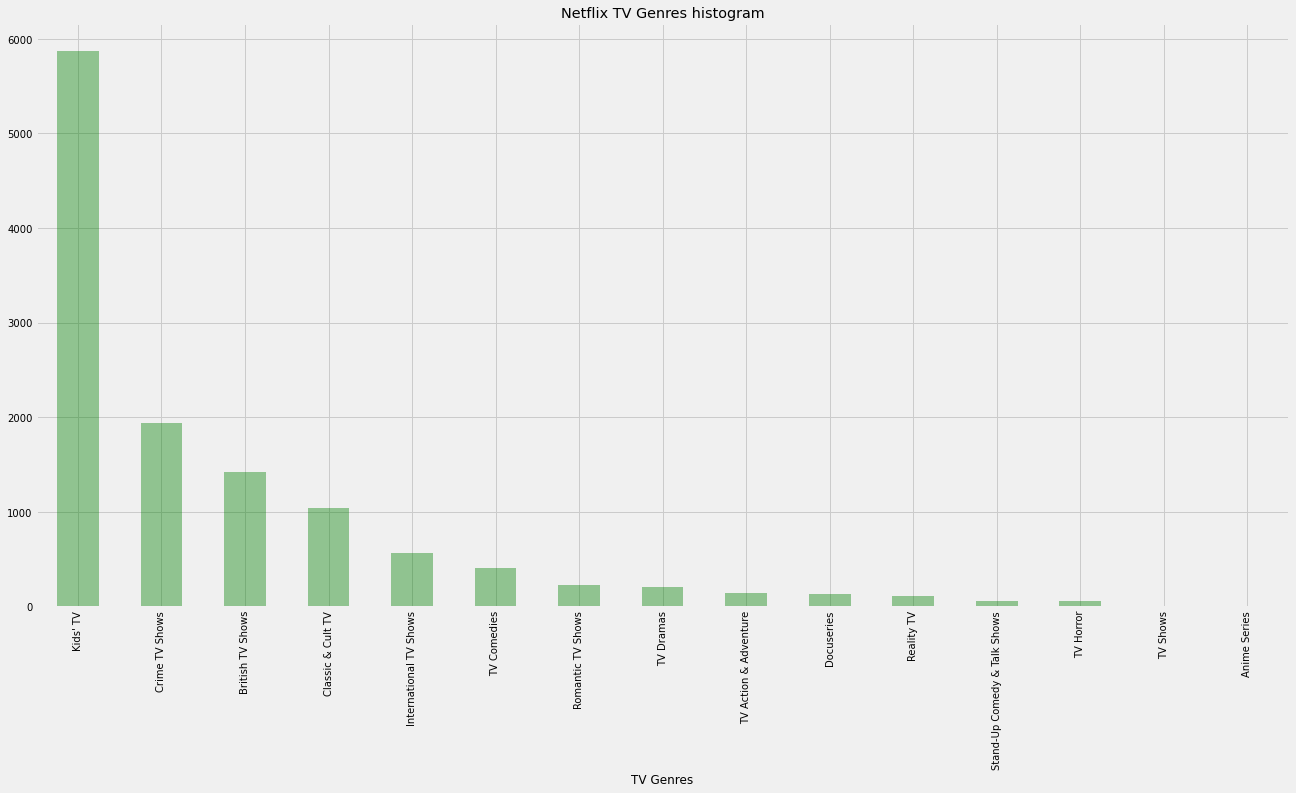

In [25]:
tv_shows_by_genre = tv_shows['genre1'].value_counts()
h=tv_shows_by_genre.plot(alpha=0.4, color='green', kind='bar', figsize=(20,10), title = 'Netflix TV Genres histogram');
h.set_xlabel('TV Genres');

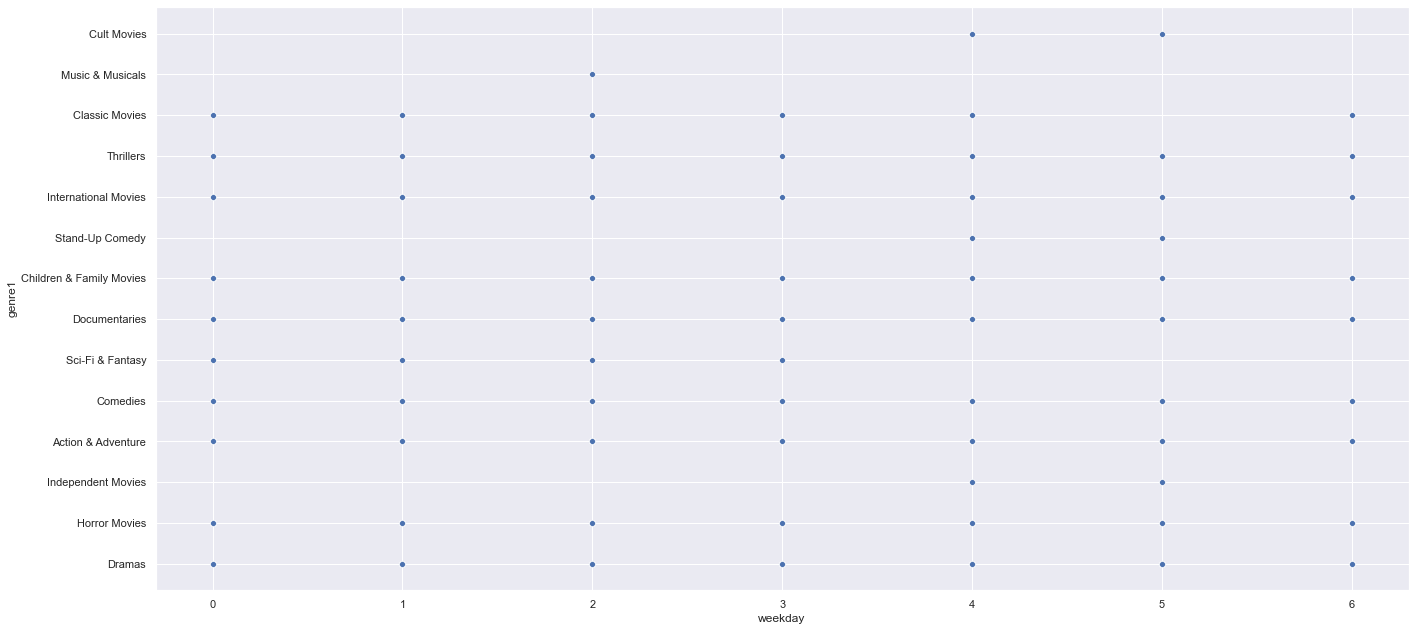

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="weekday", y="genre1",data=movies);

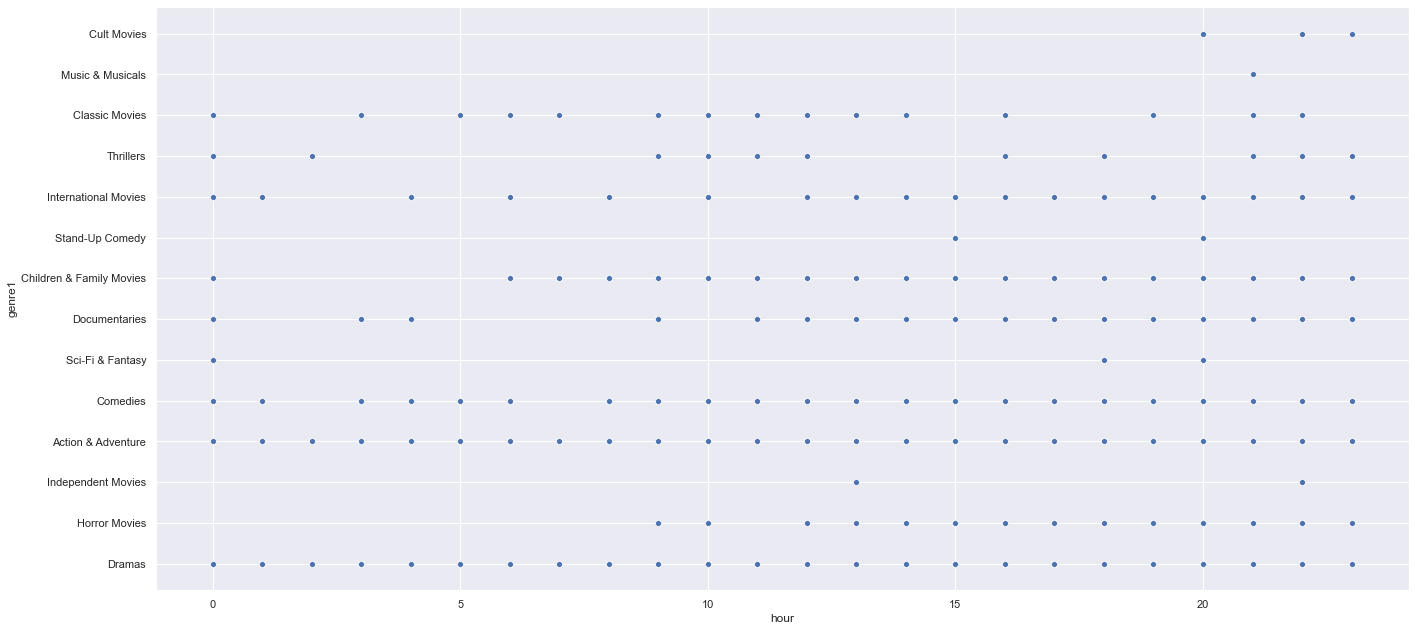

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="hour", y="genre1",data=movies);

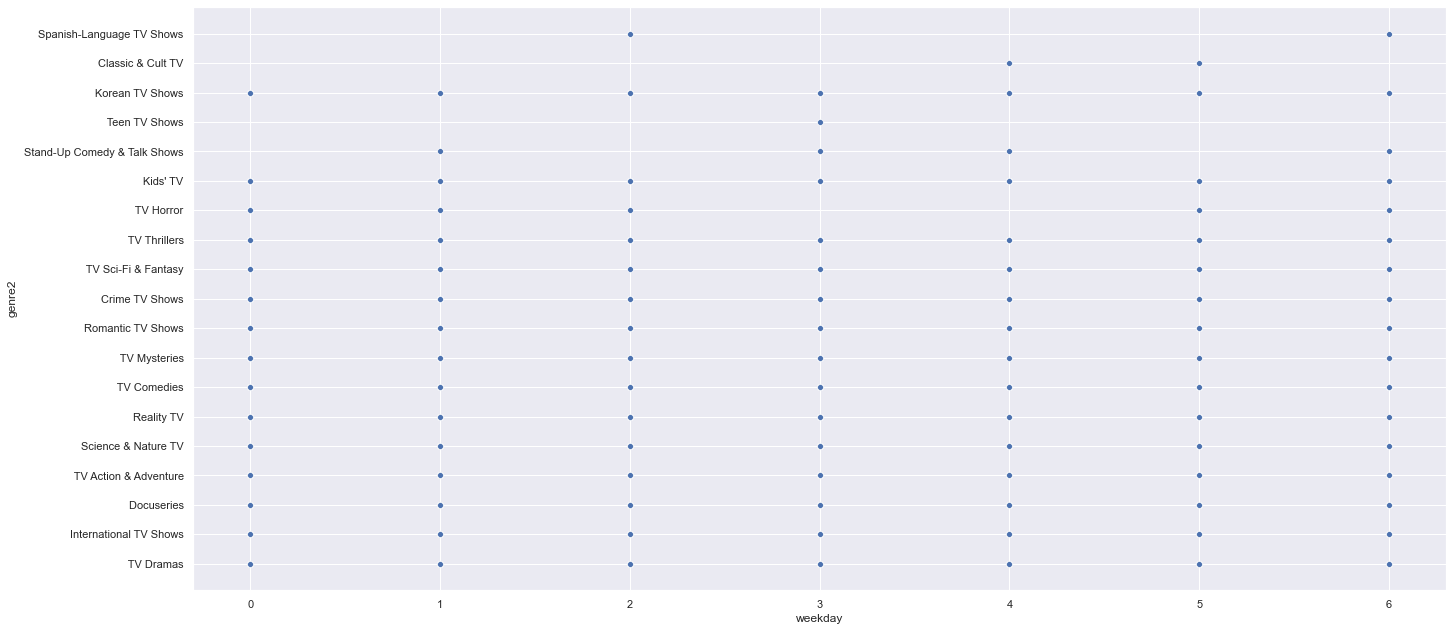

In [28]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="weekday", y="genre2",data=tv_shows);

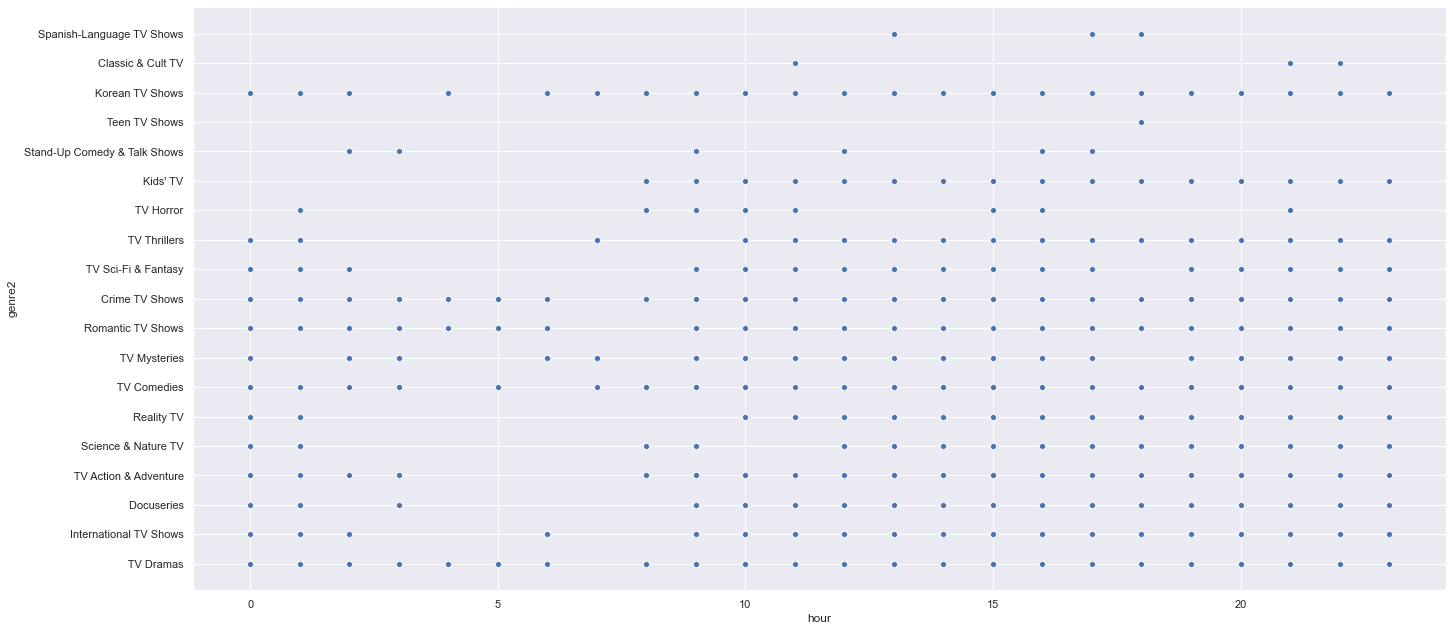

In [29]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x="hour", y="genre2",data=tv_shows);

In [30]:
movies_genre_hist = movies.groupby(['hour'])['genre1'].describe(include='all')
movies_genre_hist

,count,unique,top,freq
hour,,,,
0,53,9,Action & Adventure,23
1,29,4,Dramas,14
2,9,3,Dramas,5
3,8,5,Dramas,4
4,16,5,Action & Adventure,5
5,9,4,Dramas,4
6,12,6,Dramas,4
7,14,4,Children & Family Movies,6
8,17,5,Dramas,8


In [31]:
df = movies.groupby(['hour', 'genre1'])['genre1'] \
                             .size() \
                             .reset_index(name='count')
df1 = df.groupby(['hour'], sort=True).apply(lambda x: x.sort_values(['count'], ascending=False)).drop_duplicates('hour', keep='first')
df1

,,hour,genre1,count
hour,,,,
0,0,0,Action & Adventure,23
1,20,1,Dramas,14
2,34,2,Dramas,5
3,48,3,Dramas,4
4,56,4,Action & Adventure,5
5,76,5,Dramas,4
6,90,6,Dramas,4
7,99,7,Children & Family Movies,6
8,118,8,Dramas,8


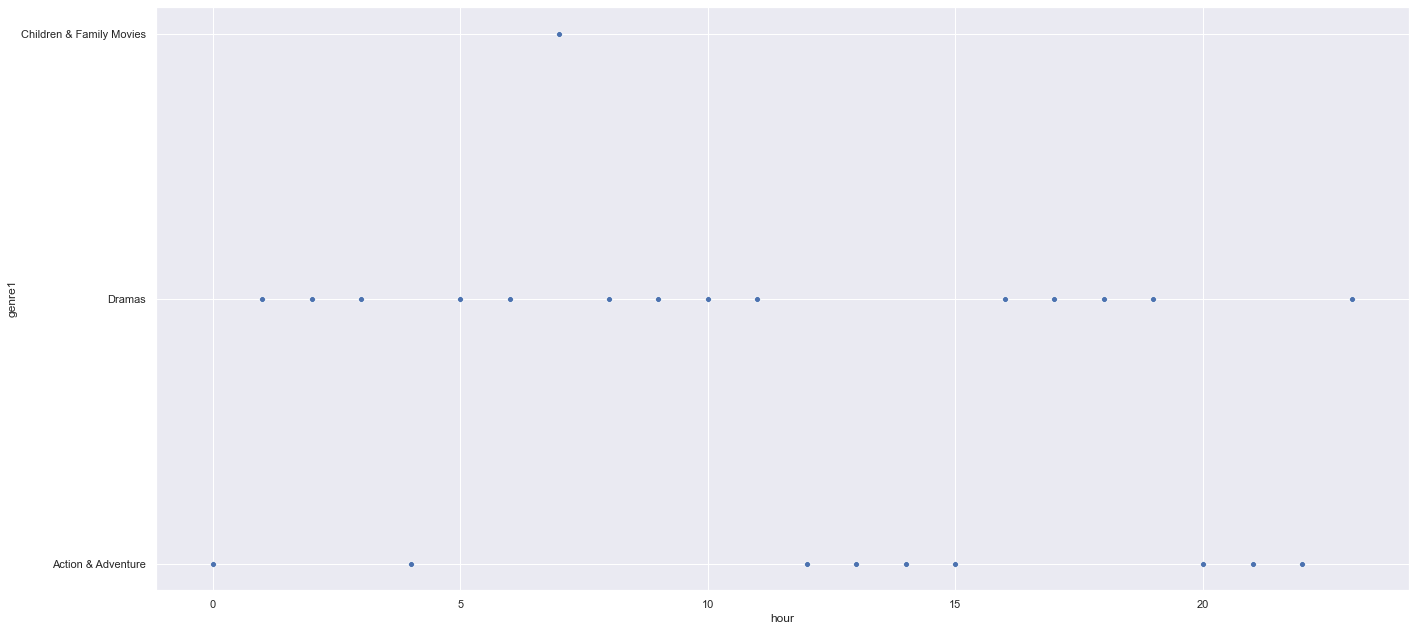

In [32]:
sns.scatterplot(x="hour", y="genre1",data=df1);

In [33]:
tv_df = tv_shows.groupby(['hour', 'genre1'])['genre1'] \
                             .size() \
                             .reset_index(name='count')
tv_df1 = tv_df.groupby(['hour'], sort=True).apply(lambda x: x.sort_values(['count'], ascending=False)).drop_duplicates('hour', keep='first')
tv_df1

,,hour,genre1,count
hour,,,,
0,3,0,Crime TV Shows,129
1,18,1,Crime TV Shows,65
2,33,2,Crime TV Shows,21
3,48,3,Crime TV Shows,14
4,65,4,International TV Shows,9
5,80,5,International TV Shows,5
6,96,6,Kids' TV,4
7,111,7,Kids' TV,57
8,126,8,Kids' TV,109


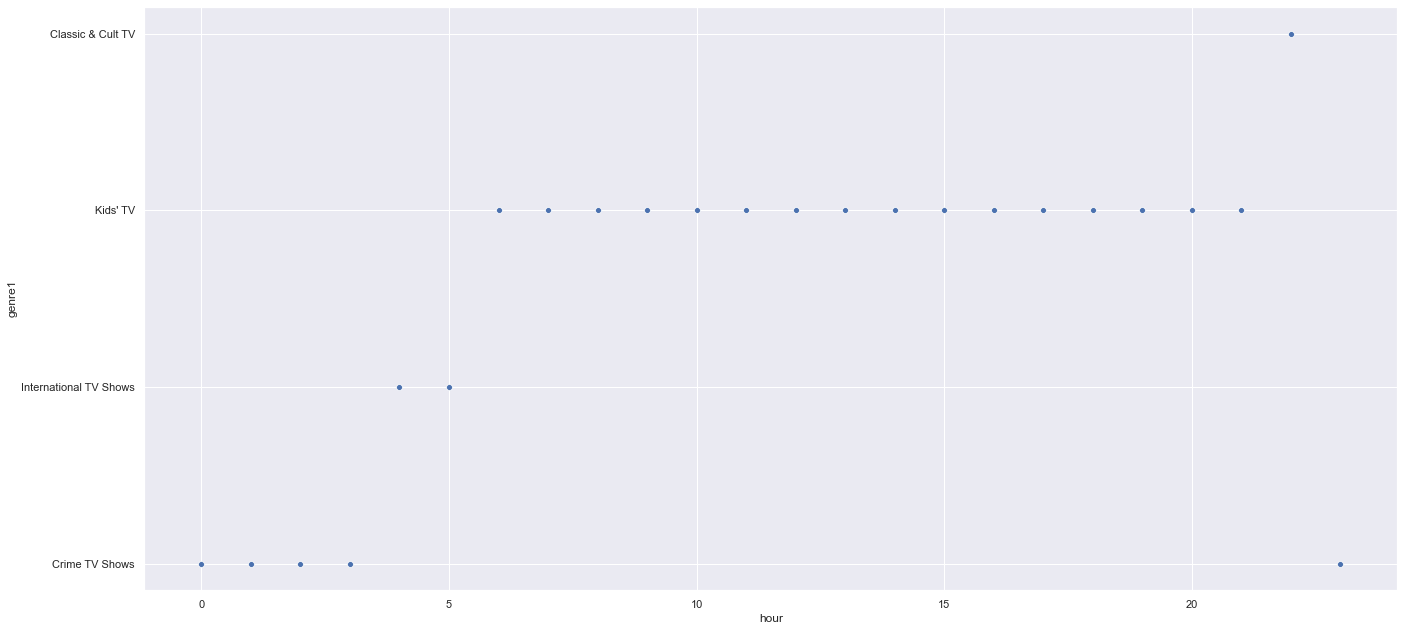

In [34]:
sns.scatterplot(x="hour", y="genre1",data=tv_df1);

In [35]:
movies_genre_hist2 = movies.groupby(['hour','genre1','genre2','genre3'])['hour'].describe().reset_index()

In [36]:
movies_genre_hist2

,hour,genre1,genre2,genre3,count,unique,top,freq
0,0,Action & Adventure,Children & Family Movies,Dramas,1,1,0,1
1,0,Action & Adventure,Comedies,International Movies,1,1,0,1
2,0,Action & Adventure,Dramas,International Movies,15,1,0,15
3,0,Action & Adventure,International Movies,Music & Musicals,1,1,0,1
4,0,Classic Movies,Dramas,International Movies,1,1,0,1
...,...,...,...,...,...,...,...,...
334,23,Dramas,International Movies,Thrillers,8,1,23,8
335,23,Dramas,Independent Movies,International Movies,11,1,23,11
336,23,Horror Movies,International Movies,Thrillers,2,1,23,2
337,23,Children & Family Movies,Comedies,Music & Musicals,1,1,23,1
